In [1]:
import json
import pandas as pd
from ripe.atlas.cousteau import (
    AtlasResultsRequest
)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
pd.options.display.max_columns = None #make sure all columns are displayed
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_61501/3392157045.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['icmp_replies'][x] = pd.json_normalize(df1['icmp_replies'][x])


[0    47.7
Name: time, dtype: float64, 0    47.7
Name: time, dtype: float64, 0    47.7
Name: time, dtype: float64, 0    47.7
Name: time, dtype: float64, 0    47.7
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.4
Name: time, dtype: float64, 0    47.1
Name: time, dtype: float64, 0    47.1
Name: time, dtype: float64, 0    47.1
Name: time, dtype: float64, 0    47.1
Name: time, dtype: float64, 0    47.1
Name: time, dtype: float64, 0    47.6
Name: time, dtype: float64, 0    47.6
Name: time, dtype: float64, 0    47.6
Name: time, dtype: float64, 0    47.6
Name: time, dtype: float64, 0    47.6
Name: time, dtype: float64, 0    47.2
Name: time, dtype: float64, 0    47.2
N

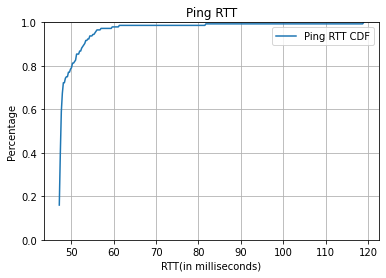

In [5]:
with open('pingTest9-17pmOct200.json', 'r') as f:
    data = json.loads(f.read())
df1 = pd.DataFrame(data)

just_rtt = []
for x, row in df1.iterrows():
    df1['icmp_replies'][x] = pd.json_normalize(df1['icmp_replies'][x])
    for result in df1['icmp_replies'][x]:
        just_rtt.append(df1['icmp_replies'][x]['time'])

#print(just_rtt)

data = np.array(just_rtt)
count, bins_count = np.histogram(data, bins=300)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Ping RTT CDF")
plt.ylim([0, 1.0])
plt.title('Ping RTT')
plt.ylabel('Percentage')
plt.xlabel('RTT(in milliseconds)')
plt.grid()
plt.legend()




/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_57082/3484295742.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['result'][x] = pd.json_normalize(df2['result'][x])


[30.265128, 29.759767, 29.616512, 36.814427, 31.735085, 30.462387, 40.092834, 39.61775, 38.679792, 47.526167, 43.21225, 48.0255, 29.0975, 30.17925, 26.987084, 30.019328, 29.833722, 30.037018, 36.055328, 43.750386, 34.575703, 39.20025, 39.496542, 39.727875, 45.491667, 42.434875, 43.514333, 28.513, 29.151459, 27.226917, 30.456739, 29.691713, 29.830542, 33.744194, 31.379164, 42.256121, 39.023833, 38.492042, 39.775916, 52.049084, 41.801917, 42.827333, 28.8545, 27.610292, 28.218667, 30.029047, 29.838243, 29.706617, 37.509012, 35.089453, 32.524372, 43.496375, 38.876667, 38.502167, 44.731375, 45.430458, 44.991833, 27.862459, 29.202042, 28.884167, 30.456664, 29.937407, 30.045173, 44.981775, 36.278234, 101.594329, 51.885666, 47.231, 57.725459, 51.202459, 42.626708, 42.363625, 32.285959, 30.798667, 31.346417, 30.432489, 29.761848, 29.788942, 38.428685, 35.400972, 33.12534, 41.988459, 40.802042, 45.42575, 46.966917, 42.533334, 42.586458, 29.574416, 27.037292, 30.507333, 30.104083, 29.840092, 30.0

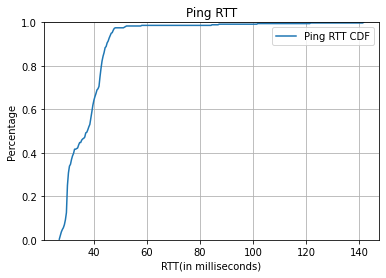

In [3]:
#Ping RTT CDF
kwargs = {
    "msm_id": 38331308
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    #df1 = pd.json_normalize(results)
    #display(df1)
    
    
    #for x, row in df1.iterrows():
        #df1['result'][x] = pd.json_normalize(df1['result'][x])

    #CREATE DATA FRAME WITH COMPLETE MEASUREMENT RESULTS
    df2 = pd.DataFrame(results)

    #CREATE EMPTY LIST just_rtt THAT WILL CONTAIN RTT VALUES
    just_rtt = []

    #min_rtt = []
    #max_rtt = []
    #avg_rtt = []

    #DISPLAY DF2 DATAFRAME
    #display(df2)

       
    #FOR EACH ROW IN DF2
    for x, row in df2.iterrows():

        #NORMALIZING THE RESULTS 
        df2['result'][x] = pd.json_normalize(df2['result'][x])

        #FOR EACH RESULT
        for result in df2['result'][x]:

            #IN THIS CASE (I AM NOT SURE IN THE CASE OF ALL MEASUREMENTS) THERE ARE THREE PACKETS SENT IN
            # EACH INDIVIDUAL MEASUREMENT, SO THERE ARE THREE RTT VALUES TO BE COLLECTED IN EACH ROW.
            #  THERE WERE KEY ERRORS WHEN APPENDING WITH A VARIABLE POSITION INDICATOR FOR THE RTT POSITION
            #   SO THIS PROBLEM WAS RESOLVED BY HARDCODING THE RTT POSITION SINCE IT WOULD BE THE SAME FOR
            #    EACH ROW

            just_rtt.append(df2['result'][x][result][0])
            
            just_rtt.append(df2['result'][x][result][1])
            
            just_rtt.append(df2['result'][x][result][2])

        #min_rtt.append(df2['min'])
        #max_rtt.append(df2['max'])
        #avg_rtt.append(df2['avg'])
    
#CREATE ARRAY WITH just_rtt LIST OF RTT VALUES
data = np.array(just_rtt)

#data1 = np.array(min_rtt)
#data2 = np.array(max_rtt)
#data3 = np.array(avg_rtt)

#CREATE HISTOGRAM, BINS = 300 RESOLVED ISSUE OF GRAPH NOT BEGINNING AT 0 PERCENT ON Y-AXIS
count, bins_count = np.histogram(data, bins=300)

#count1, bins_count1 = np.histogram(data1, bins=300)
#count2, bins_count2 = np.histogram(data2, bins=300)
#count3, bins_count3 = np.histogram(data3, bins=300)

#CALCULATE PDF, NEEDED FOR CALCULATION OF CDF
pdf = count / sum(count)

#pdf1 = count1 / sum(count1)
#pdf2 = count2 / sum(count2)
#pdf3 = count3 / sum(count3)

#CALCULATE CDF
cdf = np.cumsum(pdf)

#cdf1 = np.cumsum(pdf1)
#cdf2 = np.cumsum(pdf2)
#cdf3 = np.cumsum(pdf3)

#PLOT CDF
plt.plot(bins_count[1:], cdf, label="Ping RTT CDF")

#plt.plot(bins_count[1:], pdf, color="red", label="PDF")
#plt.plot(bins_count1[1:], cdf1, label="Ping Min RTT CDF")
#plt.plot(bins_count2[1:], cdf2, label="Ping Max RTT CDF")
#plt.plot(bins_count3[1:], cdf3, label="Ping Avg RTT CDF")
#plt.axis([0,140,0,1.0])
#SET Y-AXIS LIMIT FOR 0-1.0, THIS LEAVES THE X-AXIS FREE TO AUTOMATE RANGE AND ALLOWS FOR A MORE ACCURATE GRAPH
plt.ylim([0,1.0])
plt.title('Ping RTT')
plt.ylabel('Percentage')
plt.xlabel('RTT(in milliseconds)')
plt.grid()
plt.legend()


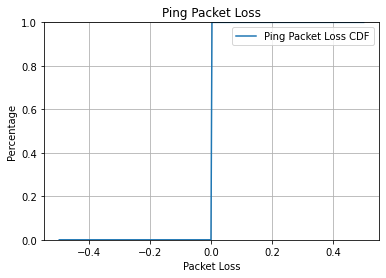

In [25]:
#DON'T NEED THIS GRAPH B/C THERE IS NO PACKET LOSS

#Ping Packet Loss CDF
kwargs = {
    "msm_id": 38331308
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    #df1 = pd.json_normalize(results)
    #display(df1)
    
    
    #for x, row in df1.iterrows():
        #df1['result'][x] = pd.json_normalize(df1['result'][x])

    #CREATE DATAFRAME WITH ENTIRETY OF MEASUREMENT RESULTS
    df2 = pd.DataFrame(results)

    #CREATE EMPTY LISTS sent AND received
    sent = []
    received = []

    #print(df2[results])
       
    #FOR EACH ROW IN DF2
    for x, row in df2.iterrows():
        
        #APPEND SENT AND RECEIVED VALUES TO THEIR DESIGNATED LISTS
        sent.append(df2['sent'])
        received.append(df2['rcvd'])

#CREATE EMPTY LIST total_loss                
total_loss = []

#SUBTRACT RECEIVED VALUES FROM SENT VALUES TO FIND TOTAL LOSS, APPEND RESULT TO total_loss LIST
zip_object = zip(sent, received)
for sent, received in zip_object:
    total_loss.append(sent-received)

#SET DATA TO AN ARRAY MADE FROM total_loss LIST 
data = np.array(total_loss)

#CREATE HISTOGRAM
count, bins_count = np.histogram(data, bins=300)

#CALCULATE PDF
pdf = count / sum(count)

#CALCULATE CDF
cdf = np.cumsum(pdf)

#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

#PLOT CDF
plt.plot(bins_count[1:], cdf, label="Ping Packet Loss CDF")
#plt.axis([0,50,0,1.0])

plt.ylim([0,1.0])
plt.title('Ping Packet Loss')
plt.ylabel('Percentage')
plt.xlabel('Packet Loss')
plt.grid()
plt.legend()

/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_706/3209938912.py:101: RuntimeWarning: invalid value encountered in true_divide
  pdf = count / sum(count)


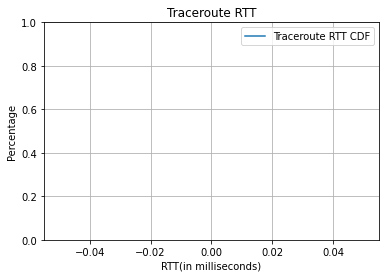

In [26]:
#MAKE THIS A BAR GRAPH
#x axis - number of hops
#y axis - average rtt and stdev across measurements 

#Traceroute RTT CDF (CURRENTLY OUT OF COMMISION)
kwargs = {
    "msm_id": 38384555
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    traceroutes = pd.json_normalize(results)
        #prototype path to an individual rtt
    #    display(df1)
    #    display(df1['result'][1][1]['result'][1]['rtt'])
    #   df2 = df1['result'][1] #traceroute level
    #    df2 = pd.json_normalize(df2) #hops level
    #    df3 = df2['result'][1]
    #    df3 = pd.json_normalize(df3) #1 hop level
        #df2['rtt']
    #    display(df3['rtt'])
        #display(df1['result'])

    traceroutes_hops = [] #all the hops for every traceroute
    hops_results = [] #need a 2D list so that measurements are not mixed together ask for help in writing this.
    hop_result2 = []
    count = 0
    count2 = 0
    count3 = 0  
    count4 = 0
    count6 = 0
    total = []  
    ip_totals = []
    ip_rtt_list = []
    traceroutes_final = []
    traceroutes_final2 = []
    trace_avg_rtt = []
    rtt_totals = 0

    for trace in traceroutes['result']:
        traceroutes_hops.append(pd.json_normalize(trace))

        for hop in traceroutes_hops[count]['result']:
            hops_results.append(pd.json_normalize(hop))
            
            #t = length(y)
            #print("t:", t)
            #for z in hops_result[]
            count2+=1
        count+=1

    #just displays list of avg rtt times in order of all ips
    #RTT per hop   

    for x in hops_results:
        
        if hasattr(x,'rtt'):
  
            rtt_totals = (x['rtt'][0] + x['rtt'][1] + x['rtt'][2])/3

            hop_result2.append(rtt_totals)

    #list of avg rtt times in order of all ips
    #display(hop_result2)

    #makes a list of ips and avg rtts together 
    
    for x in hops_results: 
        if hasattr(x,'rtt'):
            count3+=1

    for x in hops_results:

        if hasattr(x,'rtt'):
                #ip_totals.append(x['from'][0])
            rtt_totals = (x['rtt'][0] + x['rtt'][1] + x['rtt'][2])/3

            count3+=1

            ip_rtt_list.append({"ip":x['from'][0], "rtt":rtt_totals})

        hop_result2.append(rtt_totals)
    
    #list of ips and avg rtts together
    #display(ip_rtt_list)
    df10 = pd.DataFrame(ip_rtt_list)
    #display(df10)
    traceroute_rtt = []
    for x, row in df10.iterrows():
        if isinstance(df10['rtt'], float) and df10['rtt']: 
            traceroute_rtt.append(df10['rtt'])
    #display(traceroute_rtt)
    
    #print(just_rtt)
rtt_data = np.array(traceroute_rtt)
count, bins_count = np.histogram(rtt_data, bins=300)
pdf = count / sum(count)

cdf = np.cumsum(pdf)

    #plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="Traceroute RTT CDF")
#plt.axis([0,140,0,1.0])
plt.ylim([0,1.0])
plt.title('Traceroute RTT')
plt.ylabel('Percentage')
plt.xlabel('RTT(in milliseconds)')
plt.grid()
plt.legend()
    
    #creates datafram of traceroute with hops within, with only ip and avg rtt for each hop
    #this list contains 2 extra hops that need to be removed
    
    
    #for trace in traceroutes['result']:
    #   traceroutes_final.append(pd.json_normalize(trace))
        
        #track overall traceroutes
    #    count5 = 0
    #   for hop in traceroutes_final[count4]['result']:
            
            #temp normalization so that the attr can be detected in the condition
     #       temp_hop = pd.json_normalize(hop[count5])
            
      #      if hasattr(temp_hop,'rtt'):
                #print('yes')

      #          hop[count5] = ip_rtt_list[count6]
                
                #display(hop[count5])
                #track each hop overall
            
     #           count6+=1
                #display(hop[count5])
                #traceroutes_final[count4]['result']
            
            #fix off by one erro
     #       if count6 < 1:
                #track each hop in loop
     #           count5+=1
        #track each traceroute
      #  count4+=1
        
        
    #displays datafram of traceroute with hops within, with only ip and rtt for each hop
    
    #display(traceroutes_final[0]['result'])
    
    #count, bins_count = np.histogram(data, bins=25)
    

    #for y in traceroutes_hops[1]['result']:
        #count2+=1
        #hops_result[1][].append(pd.json_normalize(y))
        #display(traceroutes_hops)

        #print(type(hops_results[count2]['rtt'][0]))

        #display(hop_result2)

        #display(pd.json_normalize(traceroutes['result']))

        #for y in hops['results']:
         #       hop_result.append(pd.json_normalize(y))
            #display(hops)
            #for y in hops[]
            #display(df1['result'][x])
            #df2[x] = pd.json_normalize(df1['result'][x])
            #display(df2)

        #hops = pd.Dataframe(traceroute['result'][1], columns = [])

    #    just_rtt = []


    #    for x, row in df1.iterrows():
            #for each row
    #        df1['result'][x] = pd.json_normalize(df1['result'][x])
     #       display(df1['result'][x])

            #PROBLEMS START HERE vv
      #      for hop in df1['result'][x]:
                #for each hop
       #         df1['result'][x][hop] = pd.json_normalize(df1['result'][x][hop])
       #         display(df1['result'][hop]['result'])

        #        for r in df1['result'][x][hop]:
                    #for hop result (collective)
         #           df1['result'][x][hop][r] = pd.json_normalize(df1['result'][x][hop][r])

          #          for y, row in df1['result'][x][hop][r].iterrows():
           #             #for each hop result (individual)
            #            df1['result'][x][hop][r][y] = pd.json_normalize(df1['result'][x][hop][r][y])

             #           for z in df1['result'][x][hop][r][y]:
                            #for each rtt
              #              df1['result'][x][hop][r][y][z] = pd.json_normalize(df1['result'][x][hop][r][y][z])
                            #append rtt to a list of rtts
               #             just_rtt.append(df1['result'][x][hop][r][y][z])
                            #display(df1['result'][x][hop][r][y][z])


    #data = np.array(just_rtt)


    #count, bins_count = np.histogram(data, bins=25)
    #pdf = count / sum(count)

    #cdf = np.cumsum(pdf)


    #plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    #plt.plot(bins_count[1:], cdf, label="CDF")
    #plt.legend()

/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_706/4106782427.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'][x] = pd.json_normalize(df1['result'][x])


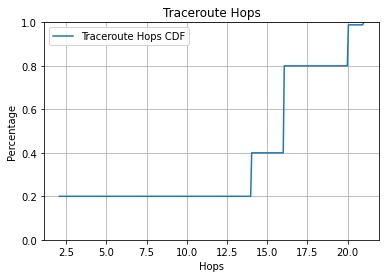

In [27]:
#FIX THIS GRAPH TO START AT ZERO

#Traceroute Hops CDF
kwargs = {
    "msm_id": 38384555
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    #CREATE A DATAFRAME WITH THE ENTIRETY OF THE MEASUREMENT RESULTS
    df1 = pd.json_normalize(results)

    #CREATE hops VARIABLE AND INITIALIZE TO ZERO
    hops = 0

    #CREATE EMPTY LIST hops_per_run
    hops_per_run = []
    #display(df1)
    
    #FOR EACH ROW IN DF1
    for x, row in df1.iterrows():
        
        #NORMALIZE THE RESULTS
        df1['result'][x] = pd.json_normalize(df1['result'][x])

        #FOR EACH HOP IN THE ROW
        for hop, row in df1['result'][x].iterrows():

            #INCREMENT hops
            hops = hops + 1
            #has attribute
            
        #APPEND hops TO hops_per_run, hops IS EQUAL TO THE NUMBER OF HOPS IN A SINGLE ROW
        hops_per_run.append(hops)
    
        #SET hops TO ZERO SO THAT EACH LOOP WILL PRODUCE THE CORRECT NUMBER OF HOPS IN A ROW
        hops = 0
    
    #print(hops_per_run)

#SET DATA TO hops_per_run     
data = np.array(hops_per_run)

#CREATE HISTOGRAM
count, bins_count = np.histogram(data, bins=300)

#CALCULATE PDF
pdf = count / sum(count)

#CALCULATE CDF
cdf = np.cumsum(pdf)


#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

#PLOT CDF
plt.plot(bins_count[1:], cdf, label="Traceroute Hops CDF")
plt.ylim([0,1.0])
plt.title('Traceroute Hops')
plt.ylabel('Percentage')
plt.xlabel('Hops')
plt.grid()
plt.legend()

#ALTHOUGH BINS=300 IN THIS CELL, THE GRAPH WILL NEVER START AT 0 PERCENT DUE TO THE DATA IT CONTAINS
            

/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_706/1105815106.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'][x] = pd.json_normalize(df1['result'][x])


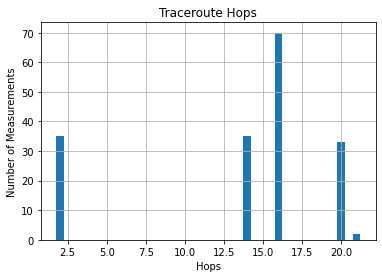

In [28]:
#Traceroute Hops BAR GRAPH
kwargs = {
    "msm_id": 38384555
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    #CREATE A DATAFRAME WITH THE ENTIRETY OF THE MEASUREMENT RESULTS
    df1 = pd.json_normalize(results)

    #CREATE hops VARIABLE AND INITIALIZE TO ZERO
    hops = 0

    #CREATE EMPTY LIST hops_per_run
    hops_per_run = []
    #display(df1)
    
    #FOR EACH ROW IN DF1
    for x, row in df1.iterrows():
        
        #NORMALIZE THE RESULTS
        df1['result'][x] = pd.json_normalize(df1['result'][x])

        #FOR EACH HOP IN THE ROW
        for hop, row in df1['result'][x].iterrows():

            #INCREMENT hops
            hops = hops + 1
            #has attribute
            
        #APPEND hops TO hops_per_run, hops IS EQUAL TO THE NUMBER OF HOPS IN A SINGLE ROW
        hops_per_run.append(hops)
    
        #SET hops TO ZERO SO THAT EACH LOOP WILL PRODUCE THE CORRECT NUMBER OF HOPS IN A ROW
        hops = 0
    
#CREATE count_num TO KEEP TRACK OF NUMBER OCCURENCES
count_num = 0

#CREATE unique_num LIST
unique_num = []

#CREATE num_occurence LIST
num_occurence = []

#FOR EACH item IN hops_per_run
for item in hops_per_run:
    #IF THE ITEM IS NOT IN THE unique_num LIST, ADD IT
    if item not in unique_num:
            unique_num.append(item)
#WE NOW HAVE A LIST OF ALL THE UNIQUE NUMBERS OF HOPS

#print(unique_num)

#FOR EACH i IN unique_num
for i in unique_num:
    #print(i)
    #FOR EACH item IN hops_per_run
    for item in hops_per_run:
        #IF THE item IS EQUAL TO i THEN INCREMENT count_num
        if item == i:
            count_num = count_num + 1
    #APPEND count_num TO num_occurence
    num_occurence.append(count_num)
    #print(count_num)
    #RESET count_num
    count_num = 0
#WE NOW HAVE A LIST OF THE NUMBER OF OCCURENCES OF EACH UNIQUE NUMBER OF HOPS

#print(num_occurence)


plt.bar(x = unique_num, height = num_occurence, width = 0.5)
plt.title('Traceroute Hops')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
plt.grid()


/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_706/3788445546.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'][x] = pd.json_normalize(df1['result'][x])              #normalize the results
/Users/emily/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emily/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/emily/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


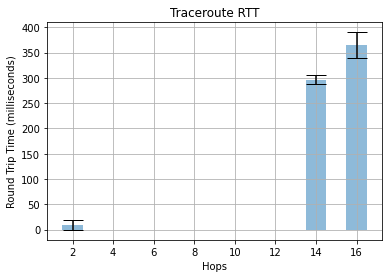

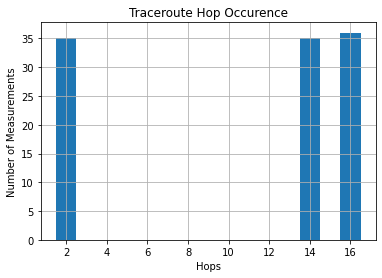

In [29]:
#Traceroute RTT and Traceroute Hops
import math
kwargs = {
    "msm_id": 38384555
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:

    #CREATE A DATAFRAME WITH THE ENTIRETY OF THE MEASUREMENT RESULTS
    df1 = pd.json_normalize(results)

    rtt_within_hop = 0              #where we will add the 0-3 rtt results for each individual hop
    rtt_within_hop_count = 0        #to keep track of how many rtt results are in each hop
    average_rtt = 0                 #for the average rtt within each hop
    total_rtt_one_measurement = 0   #to add all of the hop averages to find overall rtt within one traceroute measurement

    traceroutes_hops = []           #all the hops for every traceroute
    hops_results = []               #need a 2D list so that measurements are not mixed together ask for help in writing this.
    hop_result2 = []                #holds average rtts per hop
    count = 0                       #count measurements
    count2 = 0                      #count hops
  

    for trace in df1['result']:     #for each measurement
        traceroutes_hops.append(pd.json_normalize(trace)) 

        for hop in traceroutes_hops[count]['result']:   #for each hop
            hops_results.append(pd.json_normalize(hop))
            
            count2+=1
        count+=1
      

    for x in hops_results:                                                     #for each hop

        #research iperf

        if hasattr(x,'rtt'):                                                #if the hop has an rtt column

            if hasattr(x,'x') == False or (x['x'][0] == '*') == False:      #if it doesn't have an x column or if the x column is not equal to *
                rtt_within_hop = rtt_within_hop + x['rtt'][0]               #add the rtt to the rtt_within_hop variable
                rtt_within_hop_count = rtt_within_hop_count + 1             #increment count
            if hasattr(x,'x') == False or (x['x'][1] == '*') == False:
                rtt_within_hop = rtt_within_hop + x['rtt'][1]
                rtt_within_hop_count = rtt_within_hop_count + 1
            if hasattr(x,'x') == False or (x['x'][2] == '*') == False:
                rtt_within_hop = rtt_within_hop + x['rtt'][2]
                rtt_within_hop_count = rtt_within_hop_count + 1

        if rtt_within_hop_count == 0:                                       #if the count is zero then set average_rtt to * (so that it is easy to find
            average_rtt = '*'                                               #the measurements that did not complete later in the process and to avoid errors)
        else:
            average_rtt = rtt_within_hop / rtt_within_hop_count             #if count is not zero then calculate the rtt average

        hop_result2.append(average_rtt)                                     #append the averages to a list hop_result2

        rtt_within_hop = 0                                                  #reset rtt_within_hop, rtt_within_hop_count, and average_rtt to zero
        rtt_within_hop_count = 0
        average_rtt = 0



    hops = 0                    #keeps track of hop number
    hops_per_run = []           #list to hold the hop numbers
    start = 0                   #needed for range
    stop = 0                    #needed for range
    total_rtt_all_measurements = []     #list to hold the total rtts for each measurement
    count_m = 0                 #keeps track of how many measurements you have gone through (not really needed)
    count_star = 0              #keeps track of stars encountered (not really needed)
    

    for x, row in df1.iterrows():                                           #for each row in df1
        
        df1['result'][x] = pd.json_normalize(df1['result'][x])              #normalize the results

        for hop, row in df1['result'][x].iterrows():                        #for each hop in a single row

            hops = hops + 1                                                 #increment hops
            
        hops_per_run.append(hops)                                           #append hops to hops_per_run, hops is equal to the number of hops in a single row (measurement)
    
        hops = 0                                                            #set hops to zero so that each loop will produce the correct number of hops per row
    
    
    for i in hops_per_run:                                                  #for each number in hops_per_run
        stop = stop + i                                                     #stop increments by i so that we can coordinate the range with the order of hop numbers in hops_per_run
        for avg in range (start, stop):                                     #for each rtt in the range
            if hop_result2[avg] == '*':                                     #if a star replaces any rtt within the range
                count_star += 1                                             #increment count_star
                total_rtt_one_measurement = '*'                             #the total_rtt_one measurement is set to * (we cannot include it in the set)
                break                                                       #and the loop is broken for that range
            total_rtt_one_measurement = total_rtt_one_measurement + hop_result2[avg]    #we add all of the rtts within range to calculate the total rtt for a single measurement
        
        total_rtt_all_measurements.append(total_rtt_one_measurement)        #add the totals to total_rtt_all_measurements
        count_m += 1                                                        #increment count_m (because the rtt of one measurement of i hops has been calculated)
        total_rtt_one_measurement = 0                                       #reset total_rtt_one_measurement to zero
        start = stop                                                        #start = stop so that we can collect data accurately
    

    unique_num = []                         #this list will hold all of the unique hop counts
    total_hop_occurence = 0                 #keeps track of hop count occurence
    collective_rtt = 0                      #keeps track of collective rtt of a specific hop count
    average_rtt_of_hop = 0                  #keeps track of average rtt of a measurement with i number of hops
    all_averages = []                       #holds all of the rtt averages
    finished_hop_num = []                   #holds the hop counts of measurements that finished
    finished_hop_count = []                 #holds the occurence of measurements that finished
    data_for_stddev = []                    #will hold the rtts temporarily to calculate standard deviation
    stddev = 0
    std_for_hop = []


    for item in hops_per_run:                                               #for each item in hops_per_run
        if item not in unique_num:                                          #if the item is not in unique_num, it is added
                unique_num.append(item)

    for item in unique_num:                                                 #for each item in unique_num
        for i in range(0, len(hops_per_run)):                               #for each index within the length of hops_per_run
            if hops_per_run[i] == item:                                     #if hops_per_run at that index is equal to the item in unique_num
                if total_rtt_all_measurements[i] != '*':                    #if the rtt at index i of total_rtt_all_measurements is not a * (* means the measurement did not complete)
                    total_hop_occurence += 1                                #increment total_hop_occurence
                    collective_rtt += total_rtt_all_measurements[i]         #add the rtt to collective_rtt
                    data_for_stddev.append(total_rtt_all_measurements[i])

        if total_hop_occurence != 0:                                        #if total_hop_occurence is not zero
            average_rtt_of_hop = collective_rtt / total_hop_occurence       #calculate the average rtt of hop count "item"
            finished_hop_num.append(item)                                   #append hop count "item" to finished_hop_num
            finished_hop_count.append(total_hop_occurence)                  #append the total_hop_occurence to finished_hop_count
        else:
            average_rtt_of_hop = '*'                                        #if total_hop_occurence is zero, the average rtt of the hop count "item" is set to *
        if average_rtt_of_hop != '*':                                       #if the average_rtt_of_hop is not a * (measurements were completed), append to all_averages
            all_averages.append(average_rtt_of_hop)
        total_hop_occurence = 0                                             #reset total_hop_occurence and collective_rtt to zero
        collective_rtt = 0

        stddev = np.std(data_for_stddev)
        if math.isnan(stddev) == False:
            std_for_hop.append(stddev)
        data_for_stddev.clear()

    
    # zip_object = zip(unique_num, all_averages)
    # display(list(zip_object))
    # zip_object = zip(finished_hop_num, finished_hop_count)
    # display(list(zip_object))

plt.bar(x = finished_hop_num, height = all_averages, width = 1, yerr = std_for_hop, align='center', alpha=0.5, capsize=10)
plt.title('Traceroute RTT')
plt.ylabel('Round Trip Time (milliseconds)')
plt.xlabel('Hops')
plt.grid()
plt.show()

plt.bar(x = finished_hop_num, height = finished_hop_count, width = 1)
plt.title('Traceroute Hop Occurence')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
plt.grid()
plt.show()

#combine traceroute hops cell into this cell because we already have access to which measurements completed so we can add a count var within
#the for loop to capture the occurences of completed measurements per hop count and append to a list then graph both inside of one cell :)









    
    


    
        
